In [11]:
import pandas as pd

# Defina a pasta onde estão os arquivos
dataset_path = "C:/Users/gabis/OneDrive/Documentos/T1CdD/ml-32m/"

# Carregar arquivos CSV
movies = pd.read_csv(dataset_path + "movies.csv")      # filmes
ratings = pd.read_csv(dataset_path + "ratings.csv")    # avaliações
links = pd.read_csv(dataset_path + "links.csv")        # links
tags = pd.read_csv(dataset_path + "tags.csv")          # tags (opcional)

# Verificar as primeiras linhas
print(movies.head())
print(ratings.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858


In [13]:
print(movies.columns)
print(ratings.columns)
print(links.columns)
print(tags.columns)


Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [14]:
ratings_sample = ratings.sample(100000, random_state=42)  # 100 mil linhas

In [16]:
# Ver colunas
print("Movies columns:", movies.columns)
print("Ratings columns:", ratings_sample.columns)
print("Links columns:", links.columns)




Movies columns: Index(['movieId', 'title', 'genres'], dtype='object')
Ratings columns: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Links columns: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [17]:
# Ver primeiras linhas
print(movies.head())
print(ratings_sample.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
          userId  movieId  rating   timestamp
10685861   66954      781     5.0   850944577
1552723     9877      574     4.0   945495614
6145184    38348     1088     2.0   999974867
16268584  101952     2706     1.0  1203077565
22418634  140400   275079     3.5  1653782463


In [18]:
movies.info()
ratings_sample.info()
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 10685861 to 31363669
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100000 non-null  int64  
 1   movieId    100000 non-null  int64  
 2   rating     100000 non-null  float64
 3   timestamp  100000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  87585 non-null  int64  
 1   imdbId   87585 non-n

In [19]:
ratings_sample.describe()  # média, min, max, desvio padrão das notas


,userId,movieId,rating,timestamp
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,100146.696580,29267.991780,3.543025,1.275103e+09
std,57872.667301,50897.453274,1.057165,2.567671e+08
min,10.000000,1.000000,0.500000,8.235140e+08
25%,49945.750000,1225.000000,3.000000,1.048960e+09
50%,99938.000000,3409.000000,3.500000,1.274057e+09
75%,150241.250000,44193.000000,4.000000,1.502858e+09
max,200948.000000,290577.000000,5.000000,1.697163e+09


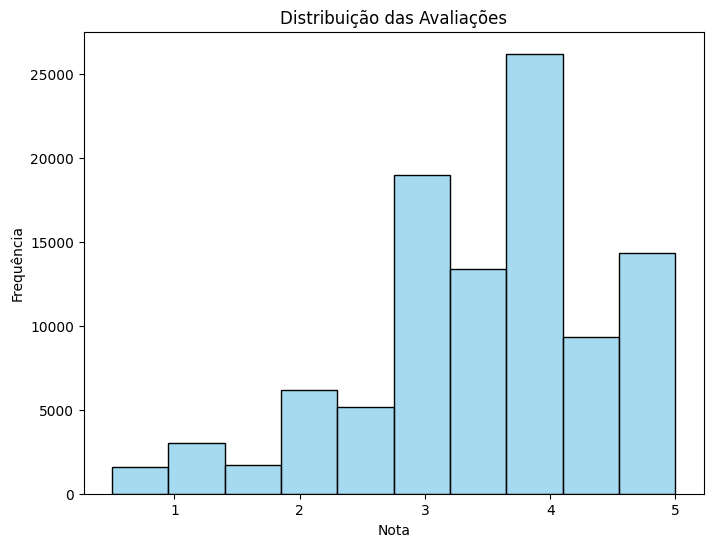

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(ratings_sample['rating'], bins=10, kde=False, color='skyblue')
plt.title("Distribuição das Avaliações")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()


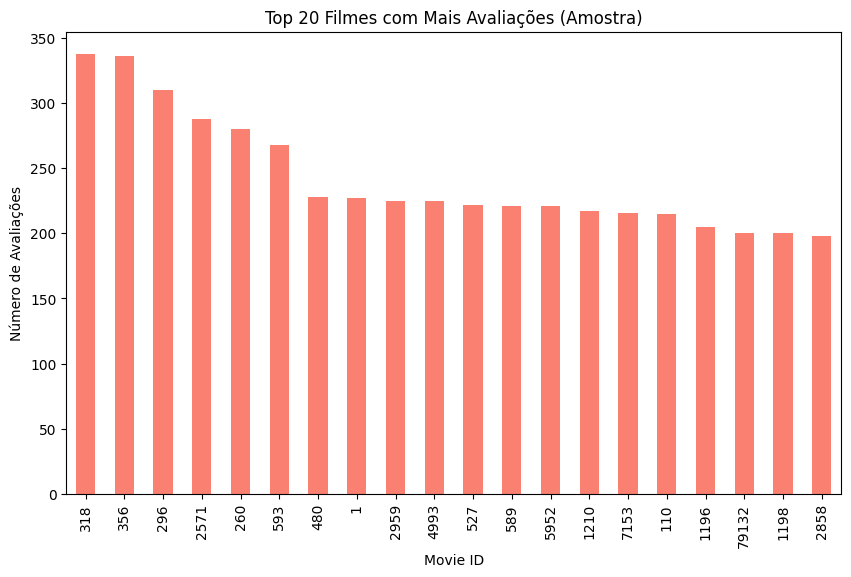

In [23]:
ratings_count = ratings_sample.groupby('movieId')['rating'].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ratings_count.head(20).plot(kind='bar', color='salmon')
plt.title("Top 20 Filmes com Mais Avaliações (Amostra)")
plt.xlabel("Movie ID")
plt.ylabel("Número de Avaliações")
plt.show()


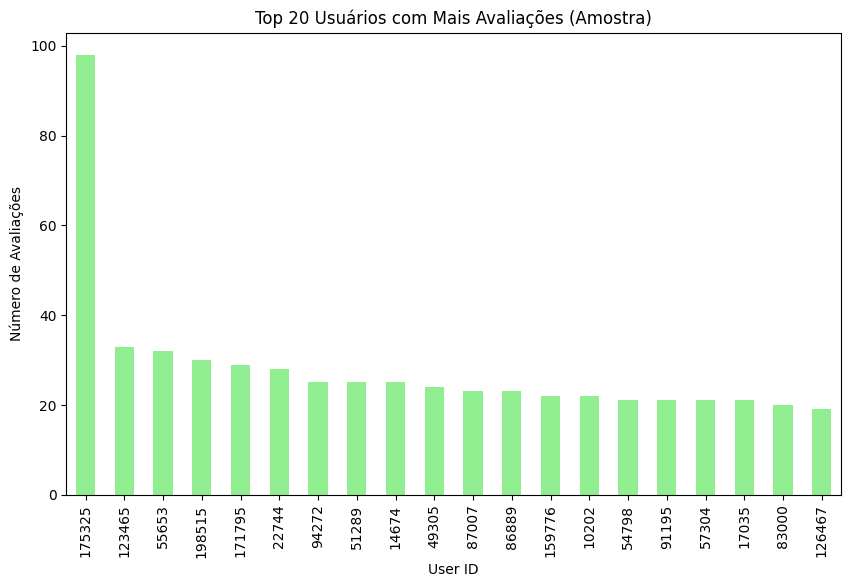

In [24]:
user_count = ratings_sample.groupby('userId')['rating'].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
user_count.head(20).plot(kind='bar', color='lightgreen')
plt.title("Top 20 Usuários com Mais Avaliações (Amostra)")
plt.xlabel("User ID")
plt.ylabel("Número de Avaliações")
plt.show()


C:\Users\gabis\AppData\Local\Temp\ipykernel_8608\1879542867.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


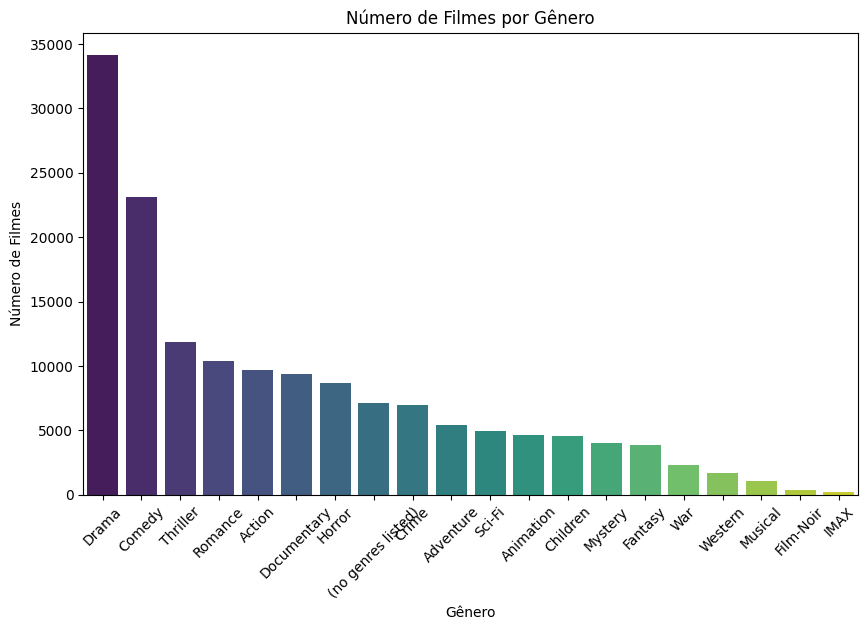

In [25]:
# Criar lista de todos os gêneros
all_genres = movies['genres'].str.split('|').explode()
genre_counts = all_genres.value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title("Número de Filmes por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Número de Filmes")
plt.xticks(rotation=45)
plt.show()
